# EP 1 de MAC 209
**Nomes/NUSP:**

    Ricardo Mikio Morita             5412562
    Alexandre Muller Jones           8038149
    Arthur Sakayan Vieira de Melo    10297647
    

# Introdução

O experimento realizado durante este primeiro Exercício-Programa(EP) buscou observar dois fenômenos plenamente descritos e bem-compreendidos: O **Movimento Retilíneo Uniforme** (MU) e o **Movimento Retilíneo Uniformemente Acelerado** (MUV).

Desprezando efeitos como atrito, a **Primeira Lei de Newton** diz que um corpo se movimentando sem a ação de uma força externa permanecerá se movendo com uma velocidade constante, descrevendo um movimento compatível com o MU. Entretanto, sob a ação de uma força constante (que se traduz em uma aceleração do objeto) de mesma direção da velocidade, como descrito pela **Segunda Lei de Newton**, teremos um aumento ou diminuição da velocidade do corpo de maneira constante que descreve o MUV.

De posse dessas observações, seguem as seguintes equações que descrevem o movimento do corpo no espaço para o MU e MUV (Notar que basta considerar $a = 0$ para obter-se as equações do MU):

| Fórmula | Observação |
|---|---|
| $$v = at + v_o$$ | $s_o$ é a posição inicial |
|$$s = s_o + v_ot _ (at^2)/2$$ | $s$ é a posição final |
|$$s = s_o + (v + v_o)/2t$$ | $v_o$ é a velocidade inicial|
|$$v^2 = v^2_o + 2a(s - s_o)$$ | $v$ é a velocidade final
|$$r = s_o + vt - (at^2)/2$$ | $a$ é a aceleração|
| $ $|$t$ é o instante de tempo |

De posse desse conhecimento, é possível fazer uma projeção do comportamento cinemático de um corpo real aplicando os dados obtidos no experimento nas equações supra- citadas e obter um modelo compatível com os resultados práticos. Entretanto, neste EP foi desenvolvido um programa que usa os dados do experimento para criar uma simulação do comportamento do corpo a partir dos dados obtidos e depois será realizada uma sobreposição da simulação com os dados reais obtidos, observando e descrevendo o resultado.

A finalidade do experimento é, portanto, de comparar o uso de simulações de computadores com os modelos teóricos já bem-definidos e comparar os resultados. A partir disso, discutir sobre a utilidade de tal ferramenta diante dos resultados.

# Método

O vídeo do experimento segue no local abaixo:

https://www.youtube.com/watch?v=VVUb16Jh-Mk

O programa e os resultados gerados estão disponíveis no seguinte repositório: https://github.com/ricardomorita42/mac0209.

Além do código escrito neste notebook, também foi usado um script python para converter os arquivos .csv numa forma em que fosse fácil plotar gráficos, substituindo as datas encontradas na primeira coluna em instantes de tempo do experimento. O código em questão está na pasta `dados/movUniforme` e `dados/movUniformVariado`, com comentários para facilitar a compreensão do mesmo.

Há duas pastas adicionais: `img`, que contém as imagens usadas neste documento, e `scripts`, que contém scripts que podem ter sido usados neste EP.

Há também duas planilhas no formato .ods na raiz do repositórito, as quais contém todos os arquivos .csv com gráficos plotados das informações gravadas pelo *Physics Toolbox* no arquivo. As duas são intituladas `experimentos mu.ods` e `experimentos muv.ods`.

# Verificação do Programa

Segue abaixo um exemplo de cálculo manual do algoritmo para verificação de corretude.

![Experimento 1](img/provaCorretude.jpg)
<div align="center"><i> Verificacação de corretude </i></div>

# Dados

## MU
Foram utilizados três celulares com a função "volta" para marcar os tempos da pessoa que realiza o experimento de andar por um trajeto pré-definido, segurando um celular com a função de acelerômetro do aplicativo **Physics Toolbox** ativada. Além disto, foi usado um celular com um tripé para filmar o experimento. O registro dos dados foi feito por uma das pessoas que marcando o tempo.

O experimento foi feito em uma superfície plana, mais especificamente entre os prédios do IME e da FAU. Na primeira parte do experimento, mediu-se o tempo do trajeto quando o transeunte passava pelas marcas 10, 20 e 30 metros, sendo que em cada marca havia uma pessoa com um cronômetro para gravar o experimento.Cada pessoa executou uma passagem pelo percurso duas vezes.

Na segunda parte do experimento, anotou-se os instantes de tempo para cada 5 metros do percurso (i.e.: Nas posições 5, 10, 15, 20, 25 e 30). Como não era possível fisicamente posicionar uma pessoa em cada sensor pela falta de pessoal e celulares, cada "sensor" gravou dois instantes, espaçados em 5 metros um do outro. Este também foi executado por cada pessoa duas vezes.

Estamos considerando o espaço inicial (`s_o`) igual a zero.

No fim do experimento de Movimento Uniforme, foram realizadas 12 travessias ao todo. Segue abaixo uma tabela com as marcas de tempo obtidas, com a Velocidade Média de cada pessoa:

In [1]:
import pandas as pd
tabela = []

dados = open("dados/dados_pratica_MU1.txt",'r')

for linha in dados:
    if ('#' not in linha):
        proc_linha = (linha.rstrip('\n')).split(';')
        
        vm = float(proc_linha[-1])/30
        str_vm = f"{vm:.4f}"
        proc_linha.append(str_vm)
        tabela.append(proc_linha)

resultado = pd.DataFrame(tabela, columns=["Nome","10m","20m","30m","VelMédia"])
display(resultado)

dados.close()

,Nome,10m,20m,30m,VelMédia
0,Alexandre1,5.69,12.42,18.23,0.6077
1,Alexandre2,6.05,12.54,18.78,0.6260
2,Arthur1,7.11,12.14,17.16,0.5720
3,Arthur2,6.34,10.36,15.93,0.5310
4,Ricardo1,7.08,13.86,19.91,0.6637
5,Ricardo2,6.99,13.44,19.73,0.6577


In [2]:
#Calculando vel média deste experimento e salvando em variáveis
alexandre = tabela[:2]
arthur = tabela[2:4]
ricardo = tabela[4:]

vm_mu1_alexandre = (float(alexandre[0][4]) + float(alexandre[1][4]))/2
vm_mu1_arthur = (float(arthur[0][4]) + float(arthur[1][4]))/2
vm_mu1_ricardo = (float(ricardo[0][4]) + float(ricardo[1][4]))/2

#Salvando o tempo médio em variáveis
tm_mu1_alexandre = (float(alexandre[0][3]) + float(alexandre[1][3]))/2
tm_mu1_arthur = (float(arthur[0][3]) + float(arthur[1][3]))/2
tm_mu1_ricardo = (float(ricardo[0][3]) + float(ricardo[1][3]))/2

Vamos trabalhar com o Experimento dois de Movimento Uniforme agora, aonde cronometramos cada passagem de cinco em cinco metros:

In [3]:
dados = open("dados/dados_pratica_MU2.txt",'r')
tabela = []

for linha in dados:
    if ('#' not in linha):
        proc_linha = (linha.rstrip('\n')).split(';')
        
        vm = float(proc_linha[-1])/30
        str_vm = f"{vm:.4f}"
        proc_linha.append(str_vm)
        tabela.append(proc_linha)
        
resultado = pd.DataFrame(tabela, columns=["Nome","5m","10m","15m","20m","25m","30m","Vel. Média"])
display(resultado)
dados.close()

,Nome,5m,10m,15m,20m,25m,30m,Vel. Média
0,Alexandre1,2.15,4.80,8.49,11.46,14.98,18.38,0.6127
1,Alexandre2,3.22,6.13,9.20,12.30,15.50,18.64,0.6213
2,Arthur1,2.80,5.40,8.19,10.78,13.46,16.01,0.5337
3,Arthur2,3.10,5.54,7.92,10.49,11.75,15.07,0.5023
4,Ricardo1,3.80,5.40,10.50,13.75,17.15,20.57,0.6857
5,Ricardo2,3.51,7.15,10.64,14.23,15.91,19.67,0.6557


De posse destes dados, vamos calcular a Velocidade Média e tempo médio geral no experimento de Movimento Uniforme.

In [4]:
#Calculando vel média deste experimento e salvando em variáveis
alexandre = tabela[:2]
arthur = tabela[2:4]
ricardo = tabela[4:]

vm_mu2_alexandre = (float(alexandre[0][7]) + float(alexandre[1][7]))/2
vm_mu2_arthur = (float(arthur[0][7]) + float(arthur[1][7]))/2
vm_mu2_ricardo = (float(ricardo[0][7]) + float(ricardo[1][7]))/2

#salvando o tempo médio em variáveis
tm_mu2_alexandre = (float(alexandre[0][6]) + float(alexandre[1][6]))/2
tm_mu2_arthur = (float(arthur[0][6]) + float(arthur[1][6]))/2
tm_mu2_ricardo = (float(ricardo[0][6]) + float(ricardo[1][6]))/2

#Calculando a média geral das velocidades
vm_mu_alexandre = (vm_mu1_alexandre + vm_mu2_alexandre) / 2
vm_mu_arthur = (vm_mu1_arthur + vm_mu2_arthur) / 2
vm_mu_ricardo = (vm_mu1_ricardo + vm_mu2_ricardo) / 2

#Calculando a média geral dos tempos de cada experimento
tm_mu_alexandre = (tm_mu1_alexandre + tm_mu2_alexandre) / 2
tm_mu_arthur = (tm_mu1_arthur + tm_mu2_arthur) / 2
tm_mu_ricardo = (tm_mu1_ricardo + tm_mu2_ricardo) / 2

#tabelando
tabela = []
tabela.append(["Alexandre",f"{tm_mu_alexandre:.4f}",f"{vm_mu_alexandre:.4f}"])
tabela.append(["Arthur",f"{tm_mu_arthur:.4f}",f"{vm_mu_arthur:.4f}"])
tabela.append(["Ricardo",f"{tm_mu_ricardo:.4f}",f"{vm_mu_ricardo:.4f}"])

resultado = pd.DataFrame(tabela, columns=["Nome","Tempo médio","Vel. Média"])
display(resultado)



,Nome,Tempo médio,Vel. Média
0,Alexandre,18.5075,0.6169
1,Arthur,16.0425,0.5348
2,Ricardo,19.9700,0.6657


## MUV

Foram utilizados três celulares ao todo neste experimento. Uma pessoa realizou o experimento de descer, de bicileta, um trajeto pré-definido levemente inclinado, enquanto um celular com a função de acelerômetro do aplicativo **Physics Toolbox** ativada estava apoiado na cestinha da bicicleta. Outro participante do experimento filmou as decidas enquanto a cronometragem do experimento foi realizada por um terceiro participante.

O experimento foi feito em uma superfície inclinada, mais especificamente a entrada do portão principal do Parque Villa-Lobos, cuja inclinação foi medida em dois graus. Na primeira parte do experimento, mediu-se o tempo do trajeto quando o ciclista passava pelas marcas 10, 20 e 30 metros. Havia menos pessoas para executar este experimento, então usou-se apenas uma pessoa com um cronômetro para gravar o experimento, e apenas um ciclista, dado que o ciclista não deveria impactar o resultado do experimento. O ciclista executou uma passagem pelo percurso duas vezes nestas condições. Na segunda parte do experimento, anotou-se os instantes de tempo para cada 5 metros do percurso (i.e.: Nas posições 5, 10, 15, 20, 25 e 30). Este também foi executado duas vezes.

Estamos considerando o espaço inicial (`s_o`) igual a zero e a velocidade inicial (`v_o`) também sendo igual a zero.

In [5]:
dados = open("dados/dados_pratica_MUV1.txt",'r')
tabela = []

for linha in dados:
    if ('#' not in linha):
        proc_linha = (linha.rstrip('\n')).split(';')
        
        #s_o = 0 e v_o = 0, portanto s = a*t^2/2
        #ou seja, am = 2*s/(t^2)
        am = 2 * 30 / (float(proc_linha[-1]) ** 2)
        str_am = f"{am:.4f}"
        proc_linha.append(str_am)
        tabela.append(proc_linha)

resultado = pd.DataFrame(tabela, columns=["Nome","10m","20m","30m","Acel. Média"])
display(resultado)
dados.close()

#salvando Acel. Média do experimento 1
am_muv1_alexandre = (float(tabela[0][4]) + float(tabela[1][4]))/2

#salvando Tempo Médio do experimento 1
tm_muv1_alexandre = (float(tabela[0][3]) + float(tabela[1][3]))/2

,Nome,10m,20m,30m,Acel. Média
0,Alexandre1,4.54,8.11,11.80,0.4309
1,Alexandre2,4.49,8.00,10.97,0.4986


Agora vamos ao experimento dois de Moviment Uniformemente Variado, aonde cronometramos cada passagem de cinco em cinco metros.

In [6]:
dados = open("dados/dados_pratica_MUV2.txt",'r')
tabela = []

for linha in dados:
    if ('#' not in linha):
        proc_linha = (linha.rstrip('\n')).split(';')
        
        #s_o = 0 e v_o = 0, portanto s = a*t^2/2
        #ou seja, am = 2*s/(t^2)
        am = 2 * 30 / (float(proc_linha[-1]) ** 2)
        str_am = f"{am:.4f}"
        proc_linha.append(str_am)
        tabela.append(proc_linha)

resultado = pd.DataFrame(tabela, columns=["Nome","5m","10m","15m","20m","25m","30m","Acel. Média"])
display(resultado)
dados.close()

#salvando Acel. Média do experimento 2
am_muv2_alexandre = (float(tabela[0][7]) + float(tabela[1][7]))/2

#salvando Tempo médio do experimento 2
tm_muv2_alexandre = (float(tabela[0][6]) + float(tabela[1][6]))/2

,Nome,5m,10m,15m,20m,25m,30m,Acel. Média
0,Alexandre1,3.15,4.86,6.70,8.23,9.72,11.11,0.4861
1,Alexandre2,3.32,5.31,7.10,8.78,10.22,11.88,0.4251


De posse destes dados, vamos calcular a Aceleração Média geral no experimento de Movimento Uniformemente Variado.

In [7]:
tm_mu_alexandre = (tm_muv1_alexandre + tm_muv2_alexandre) / 2
am_mu_alexandre = (am_muv1_alexandre + am_muv2_alexandre) / 2

tabela = []
tabela.append(["Alexandre",f"{tm_mu_alexandre:.4f}",f"{am_mu_alexandre:.4f}"])

resultado = pd.DataFrame(tabela, columns=["Nome","Tempo Médio","Acel. Média"])
display(resultado)

,Nome,Tempo Médio,Acel. Média
0,Alexandre,11.4400,0.4602


## Sensores

Nas planilhas `experimento mu.ods` e `experimento muv.ods`, foram tabelados e plotados os gráficos de todos os experimentos realizados. a título de ilustração,vamos exibir alguns dos gráficos gerados.

### MU

Seguem abaixo dois gráfico plotados a partir dos dados dos sensores nos experimentos de Movimento Uniforme (i.e. Do .csv gerado pelo Physics Toolbox):


![Experimento 1](img/sensor_mu1.png)
<div align="center"><i> Experimento 1 </i></div>



![Experimento 2](img/sensor_mu2.png)
<div align="center"><i> Experimento 2 </i></div>


### MUV

Seguem abaixo dois gráfico plotados a partir dos dados dos sensores nos experimentos de Movimento Uniformemente Variado (i.e. Do .csv gerado pelo Physics Toolbox):


![Experimento 1](img/sensor_muv1.png)
<div align="center"><i> Experimento 1 </i></div>



![Experimento 2](img/sensor_muv2.png)
<div align="center"><i> Experimento 2 </i></div>




# Análise

Usando os dados obtidos pelo acelerômetro, foi possível estimar os tempos de cada experimento. Podemos assim simular gráficos usando Euler e a solução analítica. Para os valores de delta_t foi usado as diferenças de tempo entre as detecções do Physic Toolbox, por curiosidade se isto seria suficiente para simular um Euler razoavelmente próximo da realidade.

## MU

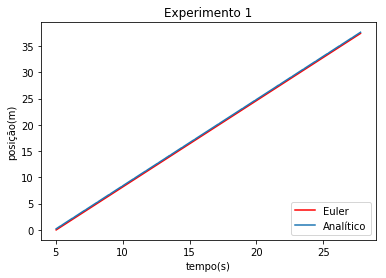

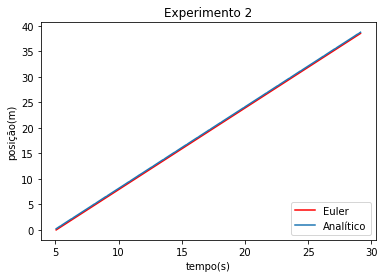

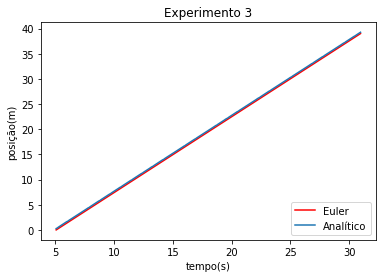

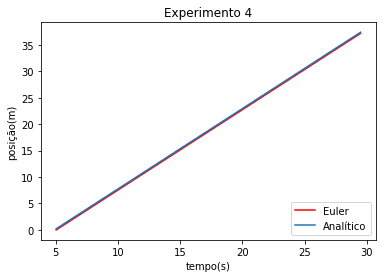

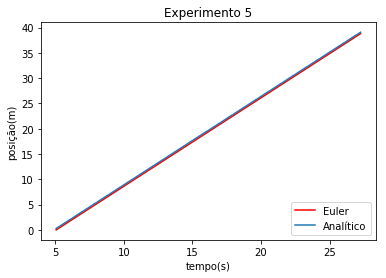

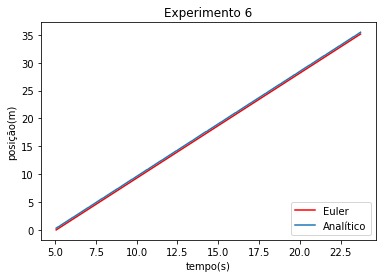

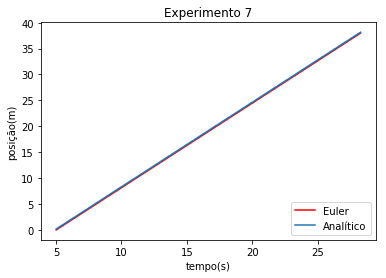

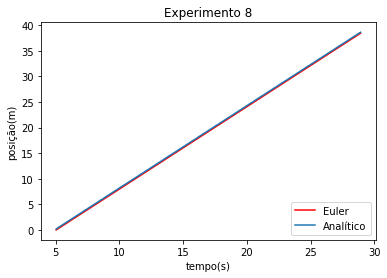

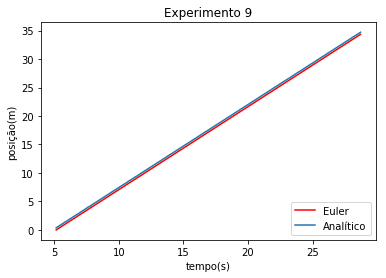

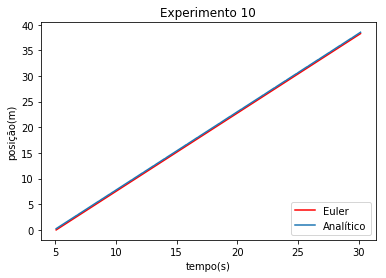

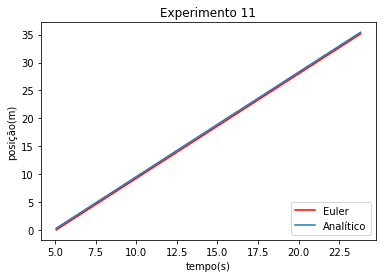

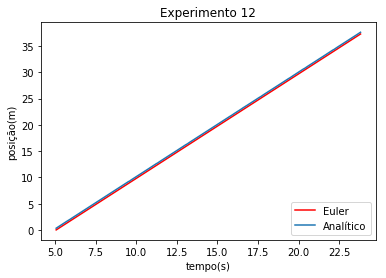

In [10]:
import matplotlib.pyplot as p

t=[[5.04,5.13,5.225,5.324,5.423,5.493,5.583,5.674,5.764,5.855,5.945,6.036,6.132,6.231,6.331,6.398,6.489,6.579,6.67,6.76,6.851,6.941,7.038,7.138,7.237,7.304,7.394,7.485,7.575,7.666,7.756,7.847,7.943,8.044,8.139,8.209,8.3,8.39,8.481,8.571,8.662,8.752,8.849,8.947,9.048,9.115,9.205,9.296,9.387,9.477,9.567,9.658,9.755,9.856,9.953,10.021,10.111,10.202,10.292,10.383,10.473,10.564,10.661,10.758,10.855,10.926,11.017,11.107,11.198,11.288,11.379,11.469,11.565,11.666,11.761,11.832,11.922,12.013,12.103,12.194,12.284,12.375,12.472,12.574,12.667,12.737,12.828,12.918,13.009,13.099,13.19,13.28,13.381,13.471,13.576,13.643,13.733,13.824,13.914,14.005,14.095,14.186,14.283,14.379,14.478,14.548,14.639,14.73,14.82,14.911,15.001,15.092,15.189,15.29,15.384,15.454,15.545,15.635,15.726,15.816,15.907,15.997,16.093,16.191,16.289,16.36,16.45,16.541,16.631,16.722,16.812,16.903,17.001,17.097,17.195,17.265,17.356,17.446,17.537,17.627,17.718,17.808,17.906,18.005,18.102,18.171,18.261,18.352,18.442,18.533,18.623,18.714,18.811,18.909,19.008,19.076,19.167,19.257,19.348,19.439,19.529,19.62,19.714,19.814,19.912,19.982,20.073,20.163,20.254,20.344,20.435,20.525,20.622,20.721,20.819,20.888,20.978,21.069,21.159,21.25,21.34,21.431,21.529,21.623,21.728,21.793,21.884,21.974,22.065,22.155,22.246,22.336,22.43,22.531,22.63,22.699,22.789,22.88,22.97,23.061,23.152,23.242,23.338,23.438,23.536,23.604,23.695,23.785,23.876,23.967,24.057,24.148,24.244,24.344,24.442,24.51,24.6,24.691,24.782,24.872,24.963,25.053,25.15,25.249,25.347,25.416,25.506,25.597,25.687,25.778,25.868,25.959,26.055,26.155,26.253,26.321,26.412,26.502,26.593,26.683,26.774,26.864,26.959,27.059,27.158,27.227,27.317,27.408,27.498,27.59,27.68,27.77,27.865,],[5.053,5.143,5.24,5.341,5.439,5.506,5.596,5.687,5.777,5.868,5.958,6.049,6.143,6.243,6.342,6.411,6.502,6.592,6.683,6.773,6.864,6.954,7.051,7.148,7.247,7.317,7.407,7.498,7.589,7.679,7.77,7.86,7.958,8.054,8.154,8.223,8.313,8.404,8.494,8.585,8.675,8.766,8.862,8.96,9.061,9.128,9.219,9.309,9.4,9.49,9.581,9.671,9.77,9.867,9.964,10.034,10.124,10.215,10.305,10.396,10.487,10.577,10.674,10.774,10.872,10.939,11.03,11.12,11.211,11.302,11.392,11.483,11.577,11.68,11.774,11.845,11.936,12.026,12.117,12.207,12.298,12.388,12.484,12.585,12.682,12.751,12.841,12.932,13.022,13.113,13.203,13.294,13.393,13.491,13.591,13.656,13.747,13.837,13.928,14.018,14.109,14.199,14.295,14.394,14.494,14.562,14.652,14.743,14.833,14.924,15.015,15.105,15.201,15.298,15.397,15.467,15.558,15.648,15.739,15.83,15.92,16.011,16.107,16.208,16.303,16.373,16.464,16.554,16.645,16.735,16.826,16.916,17.013,17.106,17.212,17.279,17.369,17.46,17.55,17.641,17.731,17.822,17.919,18.016,18.115,18.184,18.275,18.365,18.456,18.546,18.637,18.727,18.824,18.921,19.02,19.09,19.18,19.271,19.361,19.452,19.543,19.633,19.729,19.831,19.925,19.995,20.086,20.176,20.267,20.357,20.448,20.539,20.635,20.733,20.831,20.901,20.992,21.082,21.173,21.263,21.354,21.444,21.541,21.639,21.737,21.807,21.897,21.988,22.078,22.169,22.259,22.35,22.444,22.545,22.643,22.712,22.803,22.893,22.984,23.074,23.165,23.255,23.354,23.449,23.549,23.618,23.708,23.799,23.889,23.98,24.071,24.161,24.26,24.354,24.456,24.523,24.614,24.704,24.795,24.886,24.976,25.067,25.162,25.262,25.361,25.429,25.52,25.61,25.701,25.791,25.882,25.972,26.068,26.169,26.266,26.335,26.425,26.516,26.606,26.697,26.787,26.878,26.976,27.073,27.174,27.24,27.331,27.421,27.512,27.602,27.693,27.783,27.879,27.979,28.077,28.146,28.236,28.327,28.417,28.508,28.599,28.689,28.784,28.885,28.988,29.051,29.142,29.233,],[5.083,5.181,5.253,5.343,5.433,5.524,5.615,5.705,5.796,5.889,5.986,6.089,6.158,6.249,6.339,6.43,6.52,6.611,6.701,6.792,6.893,6.992,7.064,7.154,7.245,7.335,7.426,7.516,7.607,7.7,7.8,7.898,7.97,8.06,8.15,8.241,8.332,8.422,8.512,8.608,8.703,8.805,8.875,8.965,9.056,9.146,9.237,9.328,9.418,9.512,9.612,9.709,9.78,9.871,9.962,10.052,10.143,10.233,10.324,10.417,10.518,10.616,10.686,10.777,10.867,10.958,11.048,11.139,11.229,11.322,11.42,11.521,11.592,11.682,11.773,11.863,11.954,12.044,12.135,12.228,12.328,12.427,12.497,12.588,12.678,12.769,12.859,12.95,13.04,13.131,13.234,13.332,13.403,13.493,13.584,13.674,13.765,13.855,13.946,14.038,14.137,14.239,14.308,14.399,14.489,14.58,14.671,14.761,14.851,14.943,15.042,15.142,15.214,15.304,15.395,15.486,15.576,15.667,15.757,15.851,15.953,16.047,16.12,16.21,16.301,16.391,16.482,16.572,16.663,16.756,16.856,16.954,17.025,17.116,17.206,17.297,17.387,17.478,17.568,17.662,17.762,17.862,17.931,18.021,18.112,18.202,18.293,18.383,18.474,18.569,18.665,18.764,18.836,18.927,19.017,19.108,19.198,19.289,19.38,19.47,19.573,19.671,19.742,19.832,19.923,20.014,20.104,20.195,20.285,20.378,20.476,20.576,20.647,20.738,20.828,20.919,21.01,21.1,21.191,21.284,21.384,21.481,21.553,21.643,21.734,21.825,21.915,22.006,22.096,22.187,22.29,22.388,22.459,22.549,22.64,22.73,22.821,22.911,23.002,23.096,23.195,23.293,23.364,23.455,23.545,23.636,23.726,23.817,23.907,24.002,24.102,24.2,24.27,24.36,24.451,24.541,24.632,24.722,24.813,24.905,25.008,25.106,25.175,25.266,25.356,25.447,25.537,25.628,25.719,25.811,25.911,26.009,26.081,26.171,26.262,26.353,26.443,26.534,26.624,26.717,26.817,26.916,26.986,27.077,27.168,27.258,27.349,27.439,27.53,27.622,27.722,27.82,27.892,27.983,28.073,28.164,28.255,28.345,28.435,28.529,28.629,28.727,28.798,28.888,28.979,29.069,29.16,29.25,29.341,29.434,29.534,29.634,29.703,29.794,29.884,29.975,30.065,30.156,30.246,30.34,30.442,30.536,30.609,30.699,30.79,30.881,30.971,31.062,],[5.048,5.139,5.234,5.337,5.433,5.501,5.592,5.682,5.773,5.864,5.954,6.045,6.141,6.24,6.339,6.407,6.497,6.588,6.678,6.769,6.86,6.95,7.046,7.147,7.244,7.312,7.403,7.493,7.584,7.675,7.765,7.856,7.953,8.052,8.153,8.218,8.308,8.399,8.49,8.58,8.671,8.762,8.858,8.958,9.055,9.124,9.214,9.305,9.395,9.486,9.576,9.667,9.763,9.866,9.962,10.029,10.12,10.21,10.301,10.391,10.482,10.572,10.671,10.769,10.867,10.935,11.025,11.116,11.206,11.297,11.387,11.478,11.577,11.675,11.772,11.84,11.931,12.021,12.112,12.202,12.293,12.383,12.481,12.58,12.678,12.746,12.836,12.927,13.018,13.108,13.198,13.289,13.388,13.486,13.58,13.651,13.742,13.833,13.923,14.014,14.104,14.195,14.29,14.392,14.49,14.557,14.648,14.738,14.829,14.919,15.01,15.1,15.197,15.296,15.396,15.463,15.553,15.644,15.734,15.825,15.915,16.006,16.099,16.203,16.301,16.368,16.459,16.549,16.64,16.73,16.821,16.911,17.008,17.109,17.203,17.274,17.364,17.455,17.545,17.636,17.726,17.817,17.913,18.014,18.112,18.179,18.27,18.36,18.451,18.542,18.632,18.723,18.82,18.92,19.017,19.085,19.175,19.266,19.357,19.447,19.538,19.628,19.722,19.826,19.924,19.99,20.081,20.172,20.262,20.352,20.443,20.534,20.627,20.733,20.826,20.896,20.987,21.077,21.168,21.258,21.349,21.439,21.537,21.635,21.736,21.802,21.892,21.983,22.073,22.164,22.254,22.345,22.443,22.543,22.638,22.707,22.798,22.888,22.979,23.069,23.16,23.25,23.35,23.448,23.544,23.613,23.703,23.794,23.884,23.975,24.066,24.156,24.255,24.352,24.451,24.518,24.609,24.699,24.79,24.88,24.971,25.062,25.159,25.258,25.356,25.424,25.514,25.605,25.696,25.786,25.877,25.967,26.068,26.164,26.262,26.33,26.42,26.51,26.601,26.692,26.782,26.873,26.972,27.068,27.167,27.235,27.326,27.416,27.507,27.597,27.688,27.778,27.875,27.974,28.076,28.141,28.231,28.322,28.412,28.503,28.593,28.684,28.782,28.883,28.978,29.046,29.137,29.227,29.318,29.408,29.499,29.59,],[5.065,5.157,5.261,5.337,5.428,5.518,5.611,5.699,5.79,5.88,5.971,6.066,6.164,6.243,6.333,6.424,6.516,6.605,6.695,6.786,6.876,6.969,7.071,7.148,7.239,7.329,7.422,7.51,7.601,7.691,7.782,7.876,7.975,8.054,8.144,8.235,8.327,8.416,8.506,8.597,8.687,8.781,8.884,8.959,9.05,9.141,9.233,9.322,9.412,9.503,9.593,9.689,9.789,9.865,9.956,10.046,10.139,10.227,10.318,10.408,10.499,10.594,10.695,10.771,10.861,10.951,11.044,11.133,11.223,11.314,11.404,11.499,11.598,11.676,11.767,11.857,11.95,12.038,12.129,12.219,12.31,12.405,12.504,12.582,12.672,12.763,12.855,12.944,13.035,13.125,13.216,13.311,13.411,13.487,13.578,13.669,13.761,13.85,13.94,14.031,14.121,14.216,14.314,14.393,14.483,14.574,14.666,14.755,14.846,14.936,15.027,15.12,15.222,15.299,15.389,15.48,15.572,15.661,15.751,15.842,15.932,16.026,16.13,16.204,16.295,16.385,16.476,16.566,16.657,16.747,16.838,16.931,17.036,17.11,17.2,17.291,17.383,17.472,17.563,17.653,17.744,17.837,17.938,18.015,18.106,18.197,18.289,18.377,18.468,18.559,18.649,18.746,18.845,18.921,19.012,19.102,19.194,19.283,19.374,19.464,19.555,19.65,19.75,19.827,19.917,20.008,20.1,20.189,20.279,20.37,20.46,20.555,20.655,20.732,20.823,20.913,21.005,21.095,21.185,21.275,21.366,21.462,21.564,21.638,21.728,21.819,21.909,22.0,22.091,22.181,22.271,22.367,22.464,22.543,22.634,22.724,22.815,22.906,22.996,23.087,23.177,23.271,23.372,23.449,23.539,23.63,23.723,23.811,23.902,23.992,24.083,24.179,24.278,24.355,24.445,24.535,24.626,24.717,24.807,24.898,24.988,25.085,25.185,25.26,25.351,25.441,25.534,25.622,25.713,25.803,25.894,25.984,26.088,26.166,26.256,26.347,26.439,26.528,26.619,26.709,26.8,26.894,26.996,27.071,27.162,27.252,27.346,],[5.072,5.166,5.266,5.343,5.434,5.524,5.617,5.706,5.796,5.887,5.977,6.07,6.172,6.249,6.34,6.43,6.522,6.611,6.702,6.792,6.883,6.976,7.077,7.155,7.245,7.335,7.427,7.517,7.607,7.698,7.788,7.882,7.983,8.06,8.151,8.241,8.333,8.422,8.513,8.603,8.694,8.79,8.888,8.966,9.056,9.147,9.239,9.328,9.419,9.509,9.6,9.693,9.795,9.871,9.962,10.052,10.145,10.234,10.324,10.415,10.505,10.598,10.702,10.777,10.867,10.958,11.05,11.139,11.23,11.32,11.411,11.506,11.606,11.682,11.773,11.863,11.956,12.045,12.135,12.226,12.316,12.411,12.511,12.588,12.679,12.769,12.861,12.95,13.041,13.131,13.222,13.318,13.418,13.494,13.584,13.675,13.767,13.856,13.946,14.037,14.128,14.219,14.328,14.399,14.49,14.58,14.673,14.761,14.852,14.943,15.033,15.126,15.227,15.305,15.395,15.486,15.578,15.667,15.758,15.848,15.939,16.034,16.136,16.21,16.301,16.391,16.484,16.573,16.663,16.754,16.844,16.939,17.038,17.116,17.207,17.297,17.387,17.478,17.569,17.659,17.75,17.844,17.945,18.022,18.112,18.203,18.295,18.384,18.474,18.565,18.655,18.752,18.851,18.927,19.018,19.108,19.199,19.289,19.38,19.47,19.561,19.655,19.759,19.833,19.923,20.014,20.104,20.195,20.286,20.376,20.467,20.561,20.663,20.738,20.829,20.92,21.01,21.1,21.191,21.281,21.372,21.467,21.57,21.644,21.735,21.825,21.917,22.006,22.097,22.187,22.278,22.372,22.475,22.55,22.64,22.731,22.821,22.912,23.002,23.093,23.183,23.279,23.379,23.455,23.546,23.636,23.727,23.827,],[5.012,5.102,5.193,5.285,5.374,5.469,5.571,5.646,5.736,5.827,5.917,6.008,6.099,6.189,6.28,6.375,6.476,6.551,6.642,6.732,6.823,6.914,7.004,7.095,7.185,7.28,7.382,7.457,7.547,7.638,7.729,7.819,7.91,8.0,8.091,8.185,8.287,8.362,8.453,8.544,8.634,8.725,8.815,8.906,8.996,9.093,9.192,9.268,9.359,9.449,9.54,9.63,9.721,9.811,9.902,9.998,10.101,10.174,10.264,10.355,10.445,10.536,10.627,10.717,10.808,10.902,11.003,11.079,11.17,11.26,11.351,11.441,11.532,11.623,11.713,11.81,11.908,11.985,12.075,12.166,12.256,12.347,12.438,12.528,12.619,12.716,12.816,12.89,12.981,13.072,13.162,13.253,13.343,13.434,13.524,13.62,13.722,13.796,13.887,13.977,14.068,14.158,14.249,14.339,14.43,14.532,14.624,14.702,14.792,14.883,14.973,15.064,15.154,15.245,15.335,15.435,15.534,15.607,15.698,15.788,15.879,15.969,16.06,16.15,16.241,16.339,16.44,16.513,16.603,16.694,16.784,16.875,16.965,17.056,17.148,17.239,17.348,17.418,17.509,17.599,17.69,17.781,17.871,17.962,18.052,18.151,18.252,18.324,18.415,18.505,18.596,18.686,18.777,18.867,18.958,19.057,19.152,19.229,19.32,19.411,19.501,19.592,19.682,19.773,19.864,19.961,20.069,20.135,20.226,20.316,20.407,20.497,20.588,20.678,20.769,20.868,20.964,21.041,21.131,21.222,21.312,21.403,21.493,21.584,21.676,21.769,21.875,21.946,22.037,22.127,22.218,22.308,22.399,22.489,22.58,22.68,22.776,22.852,22.942,23.033,23.124,23.214,23.305,23.395,23.486,23.582,23.681,23.757,23.848,23.939,24.029,24.119,24.21,24.301,24.391,24.491,24.585,24.663,24.754,24.844,24.935,25.025,25.116,25.206,25.299,25.393,25.494,25.568,25.659,25.75,25.84,25.931,26.021,26.112,26.203,26.297,26.404,26.474,26.565,26.655,26.746,26.836,26.927,27.017,27.108,27.206,27.309,27.38,27.47,27.561,27.651,27.742,27.832,27.923,28.014,28.116,28.212,28.285,28.376,],[5.031,5.108,5.198,5.289,5.379,5.47,5.56,5.651,5.746,5.839,5.938,6.013,6.104,6.194,6.285,6.375,6.466,6.556,6.651,6.748,6.839,6.919,7.009,7.1,7.19,7.281,7.372,7.462,7.557,7.649,7.749,7.824,7.915,8.005,8.096,8.187,8.277,8.368,8.463,8.552,8.655,8.73,8.82,8.911,9.002,9.092,9.183,9.273,9.371,9.462,9.56,9.635,9.726,9.817,9.907,9.998,10.088,10.179,10.272,10.368,10.467,10.541,10.632,10.722,10.813,10.903,10.994,11.084,11.181,11.273,11.371,11.447,11.537,11.628,11.718,11.809,11.899,11.99,12.087,12.177,12.277,12.352,12.443,12.533,12.624,12.714,12.805,12.896,12.992,13.081,13.185,13.258,13.348,13.439,13.529,13.62,13.711,13.801,13.895,13.989,14.09,14.163,14.254,14.344,14.435,14.526,14.616,14.707,14.801,14.896,14.993,15.069,15.16,15.25,15.34,15.431,15.522,15.612,15.706,15.798,15.903,15.974,16.065,16.156,16.246,16.337,16.427,16.519,16.611,16.704,16.806,16.88,16.971,17.061,17.152,17.242,17.333,17.423,17.519,17.611,17.711,17.786,17.876,17.967,18.057,18.148,18.238,18.329,18.425,18.516,18.618,18.691,18.782,18.872,18.963,19.053,19.144,19.235,19.331,19.421,19.524,19.597,19.687,19.778,19.868,19.959,20.05,20.14,20.237,20.328,20.43,20.502,20.593,20.684,20.774,20.865,20.955,21.046,21.141,21.234,21.335,21.408,21.499,21.589,21.68,21.77,21.861,21.951,22.048,22.139,22.241,22.314,22.404,22.495,22.585,22.676,22.766,22.857,22.952,23.046,23.144,23.219,23.31,23.4,23.491,23.581,23.672,23.763,23.862,23.952,24.052,24.125,24.215,24.306,24.396,24.487,24.578,24.668,24.765,24.858,24.958,25.03,25.121,25.211,25.302,25.393,25.483,25.574,25.669,25.763,25.865,25.936,26.027,26.117,26.208,26.298,26.389,26.479,26.577,26.668,26.767,26.842,26.932,27.023,27.113,27.204,27.294,27.385,27.48,27.574,27.672,27.747,27.838,27.928,28.019,28.109,28.2,28.29,28.387,28.479,28.581,28.653,28.743,28.834,28.924,29.015,],[5.162,5.253,5.342,5.433,5.524,5.614,5.705,5.801,5.898,5.993,6.068,6.159,6.248,6.339,6.429,6.52,6.61,6.706,6.804,6.897,6.974,7.064,7.154,7.244,7.335,7.425,7.516,7.606,7.719,7.806,7.879,7.971,8.059,8.15,8.24,8.331,8.421,8.52,8.614,8.711,8.784,8.876,8.965,9.056,9.146,9.237,9.327,9.424,9.52,9.612,9.69,9.781,9.87,9.961,10.052,10.142,10.233,10.329,10.429,10.521,10.596,10.687,10.776,10.866,10.957,11.048,11.138,11.234,11.331,11.429,11.501,11.592,11.682,11.772,11.863,11.953,12.044,12.139,12.238,12.333,12.406,12.497,12.587,12.678,12.768,12.859,12.949,13.048,13.144,13.238,13.312,13.402,13.493,13.583,13.674,13.764,13.855,13.953,14.05,14.145,14.217,14.308,14.398,14.489,14.579,14.67,14.761,14.86,14.957,15.05,15.123,15.213,15.304,15.395,15.485,15.576,15.666,15.764,15.86,15.957,16.028,16.119,16.21,16.3,16.391,16.481,16.572,16.67,16.765,16.86,16.934,17.025,17.115,17.206,17.296,17.387,17.477,17.575,17.673,17.766,17.841,17.93,18.021,18.111,18.202,18.292,18.383,18.481,18.581,18.672,18.745,18.836,18.926,19.017,19.107,19.198,19.289,19.385,19.483,19.578,19.651,19.741,19.832,19.923,20.013,20.103,20.194,20.289,20.391,20.485,20.556,20.647,20.738,20.828,20.919,21.009,21.1,21.198,21.295,21.392,21.462,21.553,21.643,21.734,21.824,21.915,22.005,22.101,22.203,22.295,22.368,22.458,22.549,22.639,22.73,22.82,22.911,23.008,23.106,23.201,23.273,23.364,23.454,23.545,23.636,23.726,23.817,23.913,24.013,24.106,24.179,24.269,24.36,24.451,24.541,24.632,24.722,24.819,24.917,25.013,25.084,25.175,25.266,25.356,25.447,25.537,25.628,25.723,25.824,25.919,25.99,26.081,26.171,26.262,26.352,26.443,26.533,26.631,26.729,26.824,26.896,26.986,27.077,27.167,27.258,27.348,27.439,27.535,27.634,27.73,27.801,27.892,27.982,28.073,28.163,28.254,28.345,28.444,28.54,28.635,28.707,28.797,],[5.071,5.162,5.256,5.344,5.433,5.524,5.615,5.705,5.801,5.899,5.977,6.067,6.164,6.251,6.339,6.43,6.52,6.611,6.704,6.803,6.882,6.973,7.07,7.156,7.245,7.335,7.426,7.516,7.61,7.708,7.788,7.879,7.973,8.062,8.15,8.241,8.332,8.422,8.518,8.616,8.694,8.784,8.881,8.967,9.056,9.146,9.237,9.328,9.424,9.522,9.599,9.69,9.788,9.872,9.962,10.052,10.143,10.233,10.328,10.427,10.505,10.595,10.691,10.778,10.867,10.958,11.048,11.139,11.234,11.335,11.411,11.501,11.596,11.684,11.773,11.863,11.954,12.044,12.14,12.24,12.316,12.407,12.503,12.589,12.678,12.769,12.859,12.95,13.047,13.144,13.222,13.312,13.407,13.495,13.584,13.674,13.765,13.856,13.955,14.053,14.127,14.218,14.313,14.399,14.49,14.58,14.671,14.761,14.858,14.959,15.033,15.123,15.218,15.305,15.395,15.486,15.576,15.667,15.764,15.866,15.938,16.029,16.124,16.21,16.301,16.391,16.482,16.572,16.671,16.771,16.844,16.935,17.03,17.117,17.206,17.297,17.387,17.478,17.578,17.678,17.75,17.84,17.935,18.021,18.112,18.202,18.293,18.385,18.485,18.581,18.655,18.746,18.839,18.927,19.018,19.108,19.199,19.29,19.389,19.49,19.561,19.651,19.743,19.832,19.923,20.014,20.104,20.197,20.296,20.393,20.467,20.557,20.652,20.738,20.829,20.919,21.01,21.102,21.203,21.301,21.372,21.463,21.558,21.644,21.734,21.825,21.916,22.006,22.106,22.207,22.278,22.368,22.461,22.549,22.64,22.73,22.821,22.914,23.012,23.113,23.183,23.274,23.365,23.455,23.546,23.636,23.727,23.82,23.92,24.019,24.089,24.18,24.271,24.361,24.451,24.542,24.632,24.726,24.826,24.924,24.995,25.085,25.177,25.266,25.357,25.447,25.538,25.632,25.731,25.83,25.9,25.991,26.082,26.172,26.262,26.353,26.443,26.537,26.638,26.736,26.806,26.896,26.988,27.077,27.168,27.258,27.349,27.442,27.544,27.639,27.711,27.802,27.893,27.983,28.073,28.164,28.255,28.348,28.446,28.549,28.617,28.708,28.802,28.889,28.979,29.07,29.16,29.253,29.351,29.454,29.523,29.613,29.705,29.794,29.885,29.975,30.066,30.156,30.259,],[5.067,5.158,5.248,5.341,5.441,5.52,5.611,5.701,5.792,5.882,5.973,6.063,6.154,6.245,6.344,6.426,6.516,6.607,6.697,6.788,6.878,6.969,7.059,7.152,7.248,7.331,7.422,7.512,7.603,7.693,7.784,7.875,7.965,8.059,8.156,8.237,8.327,8.418,8.509,8.599,8.69,8.78,8.871,8.967,9.06,9.143,9.233,9.324,9.414,9.505,9.595,9.686,9.777,9.867,9.966,10.048,10.139,10.229,10.32,10.41,10.501,10.591,10.682,10.776,10.874,10.954,11.044,11.135,11.225,11.316,11.406,11.497,11.588,11.681,11.779,11.859,11.95,12.041,12.131,12.221,12.312,12.403,12.493,12.587,12.684,12.765,12.855,12.946,13.037,13.127,13.218,13.308,13.399,13.493,13.592,13.671,13.761,13.852,13.942,14.037,14.123,14.214,14.304,14.399,14.496,14.576,14.667,14.757,14.848,14.938,15.029,15.119,15.21,15.302,15.403,15.482,15.572,15.663,15.753,15.844,15.934,16.025,16.115,16.208,16.311,16.387,16.478,16.568,16.659,16.749,16.84,16.931,17.021,17.114,17.214,17.293,17.383,17.474,17.565,17.655,17.745,17.836,17.927,18.022,18.117,18.199,18.289,18.38,18.47,18.561,18.651,18.742,18.832,18.925,19.022,19.104,19.195,19.285,19.376,19.466,19.557,19.647,19.738,19.834,19.928,20.01,20.1,20.191,20.281,20.372,20.462,20.553,20.643,20.74,20.833,20.915,21.006,21.096,21.187,21.278,21.368,21.459,21.551,21.642,21.743,21.821,21.911,22.002,22.093,22.183,22.274,22.364,22.455,22.551,22.645,22.726,22.817,22.907,22.998,23.089,23.179,23.27,23.36,23.453,23.551,23.632,23.723,23.813,23.904,],[5.072,5.162,5.253,5.343,5.434,5.524,5.615,5.706,5.796,5.892,5.977,6.068,6.158,6.248,6.339,6.43,6.52,6.611,6.701,6.797,6.883,6.973,7.064,7.154,7.245,7.335,7.426,7.516,7.61,7.704,7.788,7.879,7.969,8.06,8.15,8.241,8.332,8.422,8.515,8.61,8.694,8.784,8.875,8.965,9.056,9.147,9.237,9.328,9.423,9.517,9.614,9.69,9.781,9.871,9.962,10.052,10.143,10.233,10.329,10.423,10.505,10.596,10.686,10.777,10.867,10.958,11.048,11.139,11.232,11.329,11.411,11.501,11.592,11.682,11.773,11.863,11.954,12.044,12.139,12.235,12.316,12.407,12.497,12.588,12.678,12.769,12.859,12.95,13.046,13.141,13.222,13.312,13.403,13.493,13.584,13.675,13.765,13.856,13.951,14.044,14.127,14.218,14.308,14.399,14.49,14.58,14.671,14.762,14.854,14.95,15.033,15.123,15.214,15.305,15.395,15.486,15.576,15.667,15.763,15.856,15.939,16.029,16.12,16.21,16.301,16.391,16.482,16.572,16.67,16.762,16.844,16.935,17.025,17.116,17.206,17.297,17.388,17.478,17.575,17.669,17.75,17.84,17.931,18.021,18.112,18.203,18.293,18.384,18.478,18.574,18.655,18.746,18.837,18.927,19.018,19.108,19.199,19.289,19.387,19.48,19.561,19.652,19.742,19.833,19.923,20.014,20.104,20.195,20.289,20.386,20.467,20.557,20.648,20.738,20.829,20.919,21.01,21.1,21.195,21.291,21.372,21.463,21.553,21.644,21.734,21.825,21.916,22.008,22.1,22.197,22.278,22.368,22.459,22.549,22.64,22.731,22.821,22.912,23.006,23.102,23.183,23.274,23.365,23.455,23.546,23.636,23.727,23.817,23.912,]]
for x in range(12):
    y=0
    
    #
    v=[30/18.23,30/18.78,30/19.91,30/19.73,30/17.16,30/15.93,30/18.38,30/18.64,30/20.57,30/19.67,30/16.01,30/15.07]
    analitico=[]
    euler=[]
    for z in range(1,len(t[x])):
        analitico.append((t[x][z]-5)*v[x])
        euler.append(y)
        y+=(v[x]*(t[x][z]-t[x][z-1]))
    p.plot(t[x][:len(euler)],euler,'r', label='Euler')
    p.plot(t[x][:len(analitico)],analitico, label='Analítico')
    p.legend(loc='lower right')
    p.title("Experimento " + str(x+1))
    p.xlabel("tempo(s)")
    p.ylabel("posição(m)")
    p.show()

## MUV

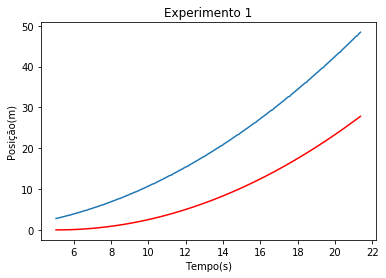

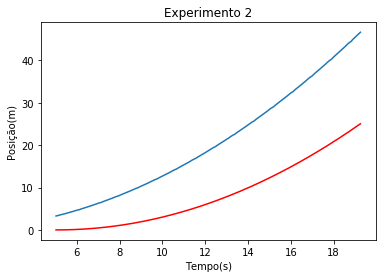

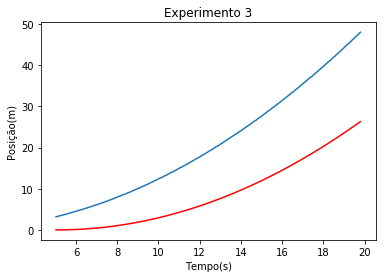

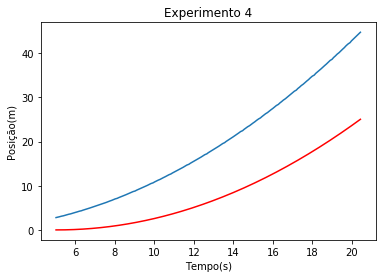

In [9]:
import matplotlib.pyplot as p
t=[[5.056,5.147,5.238,5.328,5.419,5.514,5.603,5.706,5.807,5.872,5.962,6.053,6.143,6.234,6.324,6.42,6.509,6.616,6.712,6.777,6.868,6.958,7.049,7.139,7.23,7.322,7.421,7.516,7.619,7.683,7.773,7.864,7.955,8.045,8.136,8.227,8.324,8.422,8.528,8.588,8.679,8.769,8.86,8.951,9.041,9.138,9.225,9.333,9.427,9.494,9.585,9.675,9.766,9.856,9.947,10.04,10.136,10.232,10.337,10.4,10.49,10.581,10.672,10.762,10.852,10.944,11.042,11.137,11.244,11.305,11.396,11.487,11.577,11.668,11.758,11.85,11.942,12.05,12.142,12.211,12.302,12.392,12.483,12.573,12.664,12.759,12.849,12.952,13.052,13.117,13.207,13.298,13.388,13.479,13.57,13.661,13.762,13.856,13.961,14.022,14.113,14.204,14.294,14.385,14.475,14.568,14.66,14.764,14.864,14.928,15.019,15.109,15.2,15.29,15.381,15.476,15.567,15.673,15.77,15.834,15.924,16.015,16.105,16.196,16.286,16.379,16.471,16.576,16.675,16.74,16.83,16.921,17.011,17.102,17.192,17.288,17.38,17.478,17.586,17.645,17.736,17.826,17.917,18.007,18.098,18.19,18.287,18.388,18.488,18.551,18.641,18.732,18.822,18.913,19.003,19.097,19.193,19.292,19.392,19.456,19.547,19.638,19.728,19.818,19.909,20.001,20.097,20.197,20.298,20.362,20.453,20.543,20.634,20.724,20.815,20.907,21.003,21.099,21.206,21.268,21.358,21.449,],[5.032,5.132,5.23,5.304,5.394,5.485,5.576,5.666,5.757,5.847,5.938,6.037,6.138,6.21,6.3,6.391,6.481,6.572,6.662,6.753,6.843,6.941,7.039,7.142,7.206,7.296,7.387,7.477,7.568,7.658,7.749,7.85,7.949,8.021,8.111,8.202,8.292,8.383,8.473,8.564,8.654,8.754,8.853,8.926,9.017,9.107,9.198,9.289,9.379,9.47,9.56,9.662,9.762,9.832,9.923,10.013,10.104,10.194,10.285,10.375,10.466,10.567,10.665,10.738,10.828,10.919,11.009,11.1,11.191,11.281,11.371,11.473,11.57,11.643,11.734,11.824,11.915,12.006,12.096,12.187,12.277,12.377,12.476,12.549,12.639,12.73,12.821,12.911,13.002,13.092,13.183,13.283,13.382,13.455,13.545,13.635,13.726,13.817,13.907,13.998,14.089,14.186,14.287,14.36,14.451,14.542,14.632,14.722,14.813,14.903,14.994,15.096,15.195,15.266,15.356,15.447,15.537,15.628,15.719,15.809,15.901,16.001,16.101,16.171,16.262,16.352,16.443,16.534,16.624,16.715,16.807,16.909,17.004,17.077,17.168,17.258,17.349,17.439,17.53,17.62,17.712,17.813,17.91,17.983,18.073,18.164,18.254,18.345,18.436,18.526,18.618,18.718,18.817,18.888,18.979,19.07,19.16,19.25,19.341,],[5.032,5.122,5.213,5.303,5.394,5.484,5.577,5.674,5.756,5.854,5.937,6.028,6.119,6.209,6.299,6.39,6.483,6.583,6.662,6.758,6.843,6.933,7.026,7.115,7.205,7.296,7.39,7.49,7.567,7.664,7.749,7.839,7.93,8.02,8.111,8.201,8.294,8.396,8.473,8.572,8.654,8.745,8.836,8.926,9.016,9.107,9.201,9.301,9.379,9.475,9.56,9.65,9.741,9.832,9.922,10.013,10.106,10.206,10.285,10.381,10.465,10.556,10.649,10.737,10.828,10.918,11.01,11.113,11.19,11.287,11.371,11.462,11.553,11.643,11.733,11.824,11.92,12.018,12.096,12.194,12.277,12.367,12.458,12.548,12.639,12.729,12.824,12.925,13.001,13.096,13.183,13.273,13.364,13.454,13.545,13.635,13.727,13.827,13.907,14.005,14.088,14.179,14.271,14.36,14.45,14.541,14.634,14.737,14.813,14.91,14.994,15.084,15.175,15.266,15.356,15.447,15.543,15.641,15.718,15.814,15.899,15.99,16.083,16.171,16.262,16.352,16.445,16.547,16.624,16.719,16.805,16.896,16.986,17.077,17.167,17.258,17.355,17.458,17.529,17.625,17.711,17.801,17.892,17.982,18.073,18.163,18.257,18.36,18.435,18.532,18.616,18.707,18.798,18.888,18.979,19.069,19.163,19.266,19.341,19.436,19.522,19.613,19.703,19.794,19.884,],[5.032,5.127,5.213,5.305,5.406,5.485,5.577,5.666,5.768,5.847,5.938,6.032,6.119,6.214,6.316,6.39,6.482,6.573,6.672,6.753,6.844,6.938,7.024,7.118,7.218,7.296,7.386,7.481,7.577,7.658,7.749,7.844,7.93,8.023,8.127,8.202,8.293,8.383,8.483,8.564,8.655,8.749,8.835,8.929,9.035,9.107,9.199,9.291,9.387,9.47,9.56,9.652,9.741,9.836,9.94,10.013,10.104,10.197,10.294,10.375,10.466,10.558,10.647,10.745,10.843,10.918,11.01,11.102,11.2,11.281,11.371,11.464,11.552,11.647,11.752,11.824,11.915,12.007,12.105,12.186,12.277,12.37,12.458,12.557,12.66,12.73,12.821,12.913,13.01,13.092,13.183,13.275,13.363,13.461,13.561,13.635,13.727,13.818,13.914,13.998,14.088,14.18,14.269,14.366,14.471,14.541,14.631,14.723,14.822,14.903,14.994,15.086,15.175,15.274,15.372,15.447,15.537,15.628,15.728,15.809,15.899,15.992,16.08,16.178,16.279,16.352,16.443,16.533,16.631,16.714,16.805,16.897,16.988,17.086,17.188,17.258,17.35,17.439,17.537,17.62,17.71,17.803,17.892,17.994,18.097,18.163,18.255,18.345,18.441,18.526,18.616,18.708,18.797,18.896,18.999,19.069,19.161,19.25,19.348,19.431,19.522,19.614,19.704,19.808,19.906,19.975,20.066,20.157,20.253,20.337,20.428,20.52,]]
for x in range(len(t)):
	y=0
	v=0
	a=[0.2105,0.2493,0.243,0.2125]
	analitico=[]
	euler=[]
	for z in range(1,len(t[x])):
		analitico.append(a[x]*t[x][z]**2/2)
		euler.append(y)
		y+=v*(t[x][z]-t[x][z-1])
		v+=a[x]*(t[x][z]-t[x][z-1])
	p.plot(t[x][:len(euler)],euler,'r',label="Euler")
	p.plot(t[x][:len(analitico)],analitico,label='Analítico')
	p.xlabel('Tempo(s)')
	p.ylabel('Posição(m)')
	p.title("Experimento " + str(x+1))
	p.show()

# Interpretação

Observando-se os gráficos dos sensores do celular, é possível distinguir com relativa facilidade quando o experimento começa e termina. Mesmo que haja imprecisão na determinação deste instantes, é possível notar que é melhor do que os instantes determinados pelos cronômetros. Por exemplo, nos primeiro gráfico do MU, os cronômetros detectaram que o experimento terminou em 18,23s. Se observamos os gráficos, notamos que no primeiro o experimento iniciou ao redor de 4,043 e terminou ao redor de 24,442, resultando em 20,399s. 

Esta diferença é facilmente explicada pelo tempo de reação do observador ao detectar tanto o início quanto o término do experimento. Mas não é possível distinguir em qual posição o transeunte está simplesmente pelo gráfico do sensor, sendo necessário a presença dos observadores com cronômetros para tal. Talvez se o celular fosse agitado quando a pessoa passasse por cada marcação do experimento, mas seria necessário analisar uma metodologia para tentar padronizar esta agitação e se esta agitação seria mais precisa do que a marcaçao por cronômetros.

Também é interessante notar que os gráficos do MUV e MU tiveram uma intensidade diferente; Isto porque o experimento de MUV foi sobre uma bicicleta em vez do caminhar de uma pessoa, o que aparentemente contribuiu bastante para diminuir o módulo das forças que agiram sobre o celular enquanto a medição ocorria.

## Comparação entre simulação de Euler e Solução analítica

Foi possível notar que no MU, o `delta_t` proposto foi adequado para que pudéssemos simular o movimento de maneira bem próxima ao calculado pela solução analítica. Isto pode ser derivado principalmente pela própria simplicidade do MU, na qual há apenas uma derivada da posição para ser determinada por Euler.

No MUV, o `delta_t` proposto é, claramente, inadequado para a simulação do movimento pois as duas curvas estão divergindo cada vez mais. Isto também pode ser por causa de inacurácias nas medições mas é inegável que um `delta_t` menor iria aumentar a precisão no algoritmo de Euler. 

# Analise crítica

Diversos problemas foram causados na medição. O tempo de reação de cada pessoa que funciona como um sensor foi notavelmente variável, não se podendo ter certeza se no Movimento Uniforme(MU) as variações nas marcações eram devidas a variações na velocidade ou se foi apenas imprecisão dos sensores. Esse é um aspecto a ser considerado e avaliado para um melhor aproveitamento e precisão das medições em futuros experimentos.

Queríamos realizar o experimento de Movimento Uniformemente Variado(MUV) com uma bicileta num declive para que pudéssemos ter maior precisão na aceleração; entretanto, só foi possível realizar este experimento na Semana Santa e não tínhamos todos os integrantes do grupo. Além disso, instabilidades no tempo nos levaram a realizar menos experimentos para que pudéssemos terminar antes que começasse a chover. Outros problemas encontrados envolveram a espera entre experimentos devido ao tráfego de transeuntes no local e um segurança do Parque perguntando o que estávamos fazendo (felizmente, já tínhamos terminado o experimento quando isto ocorreu).

Quanto a técnicas computacionais, mais uma vez, é preciso considerar no algoritmo erros como medições imprecisas e interferências externas, além, é claro, das próprias limitações computacionais, dado que a precisão infinita é algo além do poder de qualquer máquina. 

Usar a linguagem Python para realização dos cálculos facilitou a implementação do algoritmo. Houve uma certa dificuldade em se certificar de que o notebook Jupyter iria funcionar em todas as máquinas. Em um dos computadores, a instalação apenas do Jupyter não foi suficiente, pois a impressão de tabelas usou o módulo *pandas* e, mesmo usando o *pip* para instalar o Pandas, o notebook não reconheceu a instalação do módulo. No fim das contas, instalar o pacote Anaconda padronizou as instalações e facilitou o processo de usar o notebook para todos.

# Log

-  Experimento Prático: 6h (todos)
    -  Alexandre
    -  Arthur
    -  Ricardo

-  Programando: (total)
    -  Alexandre
    -  Arthur
    -  Ricardo - 2h

-  Elaboração do Relatório: (total)
    -  Alexandre
    -  Arthur
    -  Ricardo - 8h


# Contribuição dos Autores

Os três membros participaram dos experimentos, tanto como coordenadores, sensores e participantes. Todos também participaram da análise de dados coletados e da elaboração do relatório.

# Referências

https://en.wikipedia.org/wiki/Equations_of_motion#Constant_translational_acceleration_in_a_straight_line